In [ ]:
#Git Test_1
# to handle datasets
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for the yeo-johnson transformation
import scipy.stats as stats
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
import configparser

C:\Users\amitm2\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from Adjuct_Memory import memoryManager

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

| Variable Name	| Description	| Type
| ---	| ---	| ---
|SeriousDlqin2yrs|	Person experienced 90 days past due delinquency or worse 	|Y/N
RevolvingUtilizationOfUnsecuredLines|	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits|	percentage
age|	Age of borrower in years	|integer
NumberOfTime30-59DaysPastDueNotWorse	|Number of times borrower has been 30-59 days past due but no worse in the last 2 years.	|integer
DebtRatio|	Monthly debt payments, alimony,living costs divided by monthy gross income	|percentage
MonthlyIncome|	Monthly income	|real
NumberOfOpenCreditLinesAndLoans	|Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)|	integer
NumberOfTimes90DaysLate|	Number of times borrower has been 90 days or more past due.|	integer
NumberRealEstateLoansOrLines	|Number of mortgage and real estate loans including home equity lines of credit	|integer
NumberOfTime60-89DaysPastDueNotWorse|	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.	|integer
NumberOfDependents	|Number of dependents in family excluding themselves (spouse, children etc.)|	integer


In [4]:
# load dataset
data = pd.read_csv(config['Training_Data']['file_path'] +'\\'+ config['Training_Data']['file_name'])
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
# drop id, it is just a number given to identify each house
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.shape

(150000, 11)

In [6]:
train_data = memoryManager.reduce_mem_usage(data)

Memory usage of dataframe is 12.59 MB
Memory usage after optimization is: 2.72 MB
Decreased by 78.4%


C:\Users\amitm2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


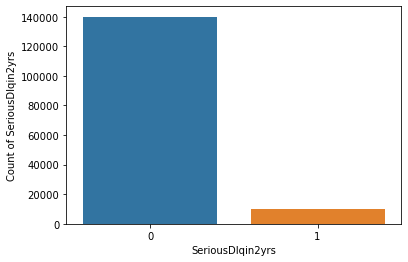

In [7]:
# countplot to evaluate target distribution # SeriousDlqin2yrs
sns.countplot(train_data['SeriousDlqin2yrs'])
plt.ylabel('Count of SeriousDlqin2yrs')
plt.xlabel('SeriousDlqin2yrs')
plt.show()

In [8]:
(len(data[data.SeriousDlqin2yrs==1])/len(data))*100

6.683999999999999

In [9]:
train_data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,NaN,NaN,0.0,0.029861,0.154175,0.559082,50720.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,352.825867,2038.782471,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.017090,14383.863281,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [11]:
Target = ['SeriousDlqin2yrs']
Percentage = ['RevolvingUtilizationOfUnsecuredLines','DebtRatio']
Real = ['MonthlyIncome']
Numeric_obj = ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]

<AxesSubplot:>

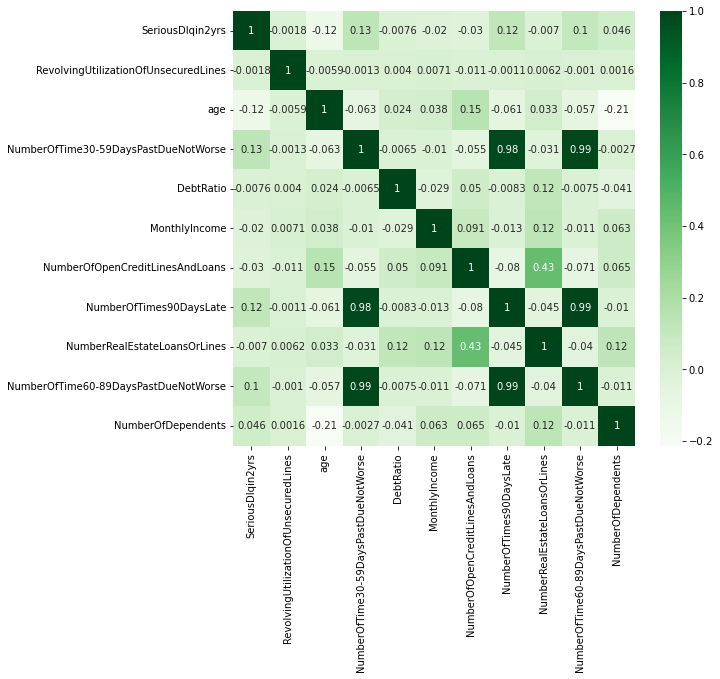

In [12]:
plt.figure(figsize = (9,8))
corr= train_data.corr()
matrix = np.triu(corr)
sns.heatmap(train_data.corr(),annot=True, cmap="Greens") #, mask=matrix)

In [13]:
highly_corr_features = ["NumberOfTime30-59DaysPastDueNotWorse",
                        "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberOfTimes90DaysLate"]

In [14]:
highly_corr_features + Target

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'SeriousDlqin2yrs']

In [27]:
ind_high_corr_feat = train_data[highly_corr_features][train_data[highly_corr_features].apply(lambda x: min(x) == max(x), 1)].index

In [28]:
train_data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

> - How can someone will default more than 60 days if we are looking 2 month time period.

In [29]:
train_data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

> - How can someone will default more than 90 days if we are looking 3 month time period.

In [30]:
train_data['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

> - Count of people defaulting 96 and 98 times in all three columns is same.
> - Seems it is default value not correct for columns `NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTime30-59DaysPastDueNotWorse`

In [31]:
train_data[train_data.NumberOfTimes90DaysLate>=96]['SeriousDlqin2yrs'].value_counts().values[0]/train_data['SeriousDlqin2yrs'].value_counts().values[1]

0.014661879114302813

> - Since ratio of defaulters where NumberOfTimes90DaysLate greater than 96 is less we will not consider those records for now

In [32]:
train_data.drop(train_data[train_data.NumberOfTimes90DaysLate>=96].index,axis=0,inplace=True)

In [33]:
default_days_df = train_data[train_data.index.isin(ind_high_corr_feat)][highly_corr_features + Target]
default_days_df = default_days_df[default_days_df.NumberOfTimes90DaysLate>0]

In [34]:
train_data.SeriousDlqin2yrs.value_counts()

0    139852
1      9879
Name: SeriousDlqin2yrs, dtype: int64

In [35]:
default_days_df.SeriousDlqin2yrs.value_counts()

0    170
1    123
Name: SeriousDlqin2yrs, dtype: int64

In [36]:
default_days_df

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,SeriousDlqin2yrs
352,2,2,2,0
612,1,1,1,0
1166,1,1,1,0
1422,1,1,1,1
1955,2,2,2,1
...,...,...,...,...
148821,1,1,1,0
148829,1,1,1,1
148874,1,1,1,0
148909,1,1,1,0


In [37]:
default_days_df[default_days_df['NumberOfTime60-89DaysPastDueNotWorse']<10]['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

1    256
2     30
3      5
5      2
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [38]:
train_data[(train_data['NumberOfTime30-59DaysPastDueNotWorse']>0) & 
           (train_data['NumberOfTime60-89DaysPastDueNotWorse']==0) &
           (train_data['NumberOfTimes90DaysLate']==0)]['SeriousDlqin2yrs'].value_counts()

0    15151
1     2063
Name: SeriousDlqin2yrs, dtype: int64

In [39]:
2063/(15151+2063)

0.11984431276867666

In [40]:
train_data[(train_data['NumberOfTime30-59DaysPastDueNotWorse']>0) & 
           (train_data['NumberOfTime60-89DaysPastDueNotWorse']>0) &
           (train_data['NumberOfTimes90DaysLate']==0)]['SeriousDlqin2yrs'].value_counts()

0    1645
1     774
Name: SeriousDlqin2yrs, dtype: int64

In [41]:
1645/(774+1645)

0.6800330715171559

In [42]:
train_data[(train_data['NumberOfTime30-59DaysPastDueNotWorse']>0) & 
           (train_data['NumberOfTime60-89DaysPastDueNotWorse']>0) &
           (train_data['NumberOfTimes90DaysLate']>0)]['SeriousDlqin2yrs'].value_counts()

1    986
0    719
Name: SeriousDlqin2yrs, dtype: int64

In [43]:
986/(719+986)

0.5782991202346041

> - There is 68% chance if person is due for 2 months then he is going to be default
> - There is 57% chance if person is due for 3 months then he is going to be default

In [46]:
train_data['SumOfDefaults'] = train_data[highly_corr_features].sum(axis=1)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='SumOfDefaults'>

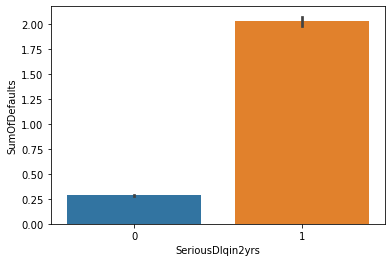

In [47]:
sns.barplot(x='SeriousDlqin2yrs',y='SumOfDefaults',data=train_data)

In [48]:
day_30 = train_data.groupby('NumberOfTime30-59DaysPastDueNotWorse').count().index
day_60 = train_data.groupby('NumberOfTime60-89DaysPastDueNotWorse').count().index
day_90 = train_data.groupby('NumberOfTimes90DaysLate').count().index

<AxesSubplot:>

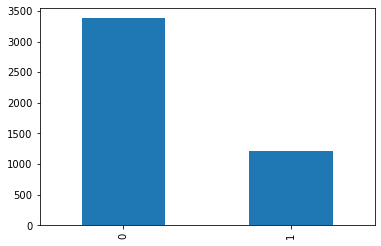

In [49]:
train_data.groupby('NumberOfTime30-59DaysPastDueNotWorse').get_group(2)['SeriousDlqin2yrs'].value_counts().plot(kind='bar')

In [ ]:
#seaborn.barplot(x=df.reputation.value_counts().index, y=df.reputation.value_counts())

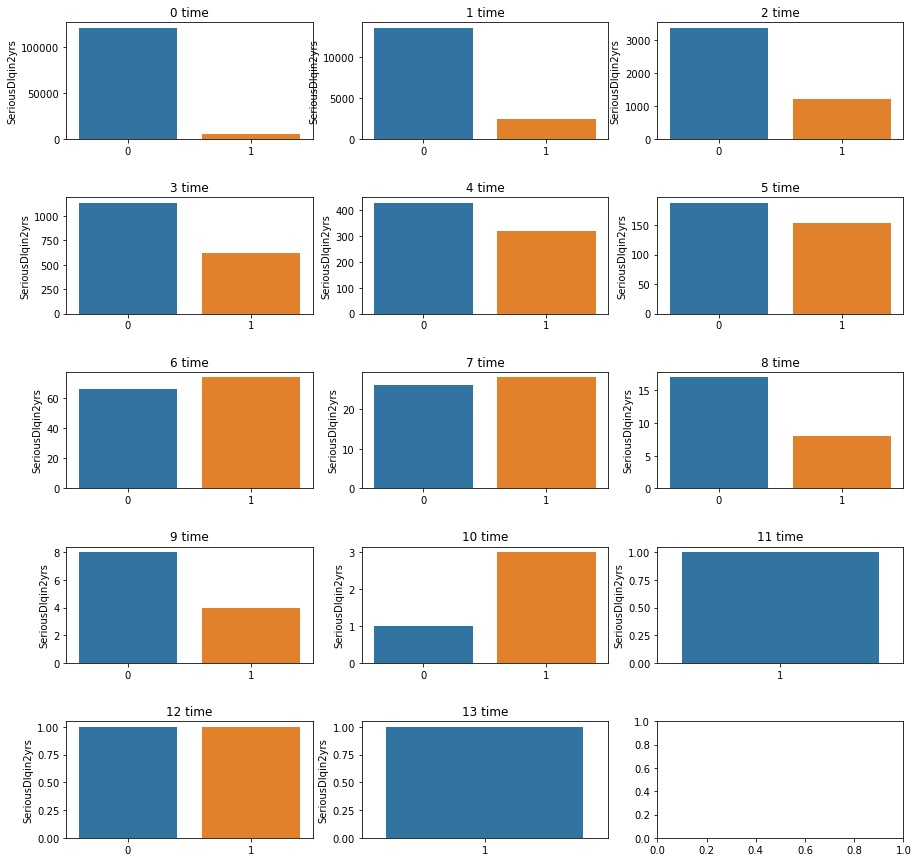

In [55]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

# loop through tickers and axes
for ticker, ax in zip(day_30, axs.ravel()):
    sns.barplot(ax=ax,x=train_data.groupby('NumberOfTime30-59DaysPastDueNotWorse').get_group(ticker)['SeriousDlqin2yrs'].value_counts().index, y=train_data.groupby('NumberOfTime30-59DaysPastDueNotWorse').get_group(ticker)['SeriousDlqin2yrs'].value_counts())
    ax.set_title(str(ticker)+" time")

plt.show()

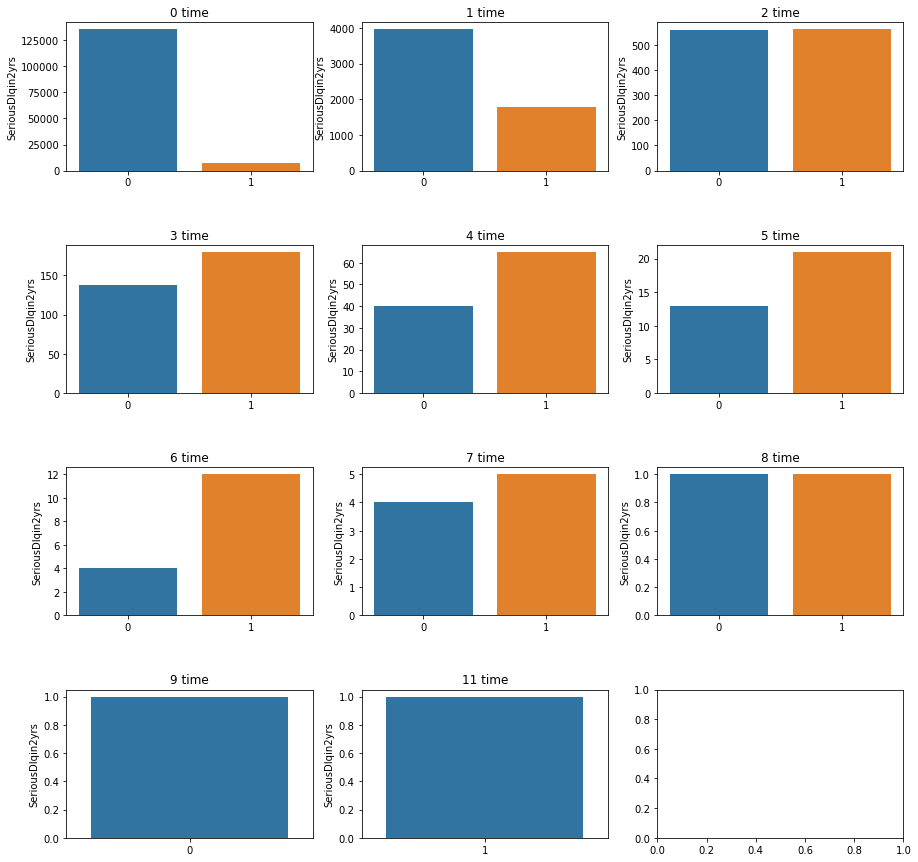

In [59]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

# loop through tickers and axes
for ticker, ax in zip(day_60, axs.ravel()):
    sns.barplot(ax=ax,x=train_data.groupby('NumberOfTime60-89DaysPastDueNotWorse').get_group(ticker)['SeriousDlqin2yrs'].value_counts().index, y=train_data.groupby('NumberOfTime60-89DaysPastDueNotWorse').get_group(ticker)['SeriousDlqin2yrs'].value_counts())
    ax.set_title(str(ticker)+" time")

plt.show()

In [61]:
train_data.groupby('NumberOfTime60-89DaysPastDueNotWorse').get_group(8)['SeriousDlqin2yrs'].value_counts()

0    1
1    1
Name: SeriousDlqin2yrs, dtype: int64

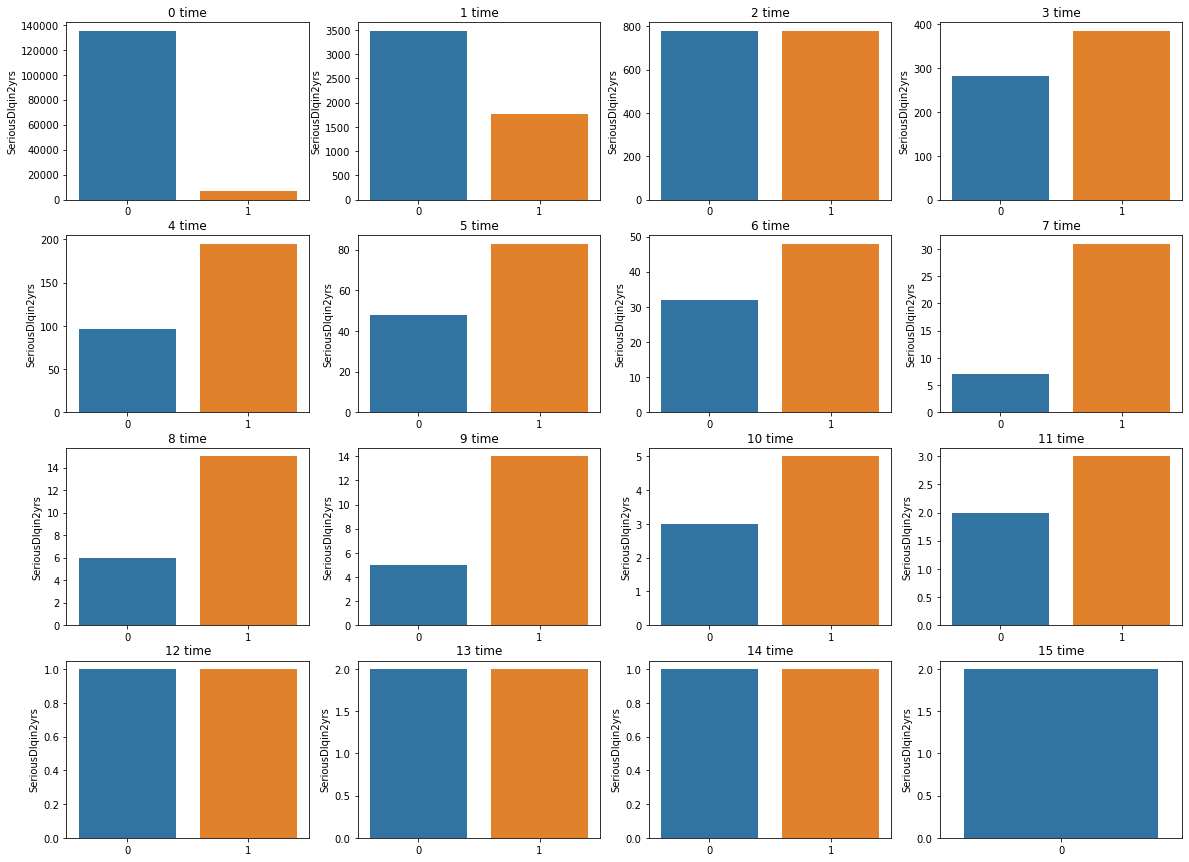

In [62]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))

# loop through tickers and axes
for ticker, ax in zip(day_90, axs.ravel()):
    sns.barplot(ax=ax,x=train_data.groupby('NumberOfTimes90DaysLate').get_group(ticker)['SeriousDlqin2yrs'].value_counts().index, y=train_data.groupby('NumberOfTimes90DaysLate').get_group(ticker)['SeriousDlqin2yrs'].value_counts())
    ax.set_title(str(ticker)+' time')

plt.show()

In [ ]:
#sns.FacetGrid(train_data, col = 'age', row = 'NumberOfTimes90DaysLate').map(sns.barplot,'SeriousDlqin2yrs')

In [64]:
train_data[highly_corr_features]

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
0,2,0,0
1,0,0,0
2,1,0,1
3,0,0,0
4,1,0,0
...,...,...,...
149995,0,0,0
149996,0,0,0
149997,0,0,0
149998,0,0,0


In [87]:

# for i in train_data['SumOfDefaults'].index:    
#     if train_data['SumOfDefaults'][i]!=0:
#         d_30 = (train_data['NumberOfTime30-59DaysPastDueNotWorse'][i]/train_data['SumOfDefaults'][i])
#         d_60 = (train_data['NumberOfTime60-89DaysPastDueNotWorse'][i]/train_data['SumOfDefaults'][i])
#         d_90 = (train_data['NumberOfTimes90DaysLate'][i]/train_data['SumOfDefaults'][i])
#         sum_d = (d_30*1)+(d_60*2)+(d_90*3)
#         train_data.loc[i,'Weighted_SumOfDefaults'] = sum_d
#     else:
#         train_data.loc[i,'Weighted_SumOfDefaults'] = train_data['SumOfDefaults'][i]

In [127]:
train_data[train_data.RevolvingUtilizationOfUnsecuredLines<1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SumOfDefaults,Weighted_SumOfDefaults
0,1,0.766113,45,2,0.802982,9120.0,13,0,6,0,2.0,2,1.0
1,0,0.957031,40,0,0.121876,2600.0,4,0,0,0,1.0,0,0.0
2,0,0.658203,38,1,0.085113,3042.0,2,1,0,0,0.0,2,2.0
3,0,0.233765,30,0,0.036050,3300.0,5,0,0,0,0.0,0,0.0
4,0,0.907227,49,1,0.024926,63588.0,7,0,1,0,0.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040680,74,0,0.225131,2100.0,4,0,1,0,0.0,0,0.0
149996,0,0.299805,44,0,0.716562,5584.0,4,0,1,0,2.0,0,0.0
149997,0,0.246094,58,0,3870.000000,NaN,18,0,1,0,0.0,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0,0.0


In [126]:
Percentage

['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio']

In [147]:
a = train_data[(train_data.RevolvingUtilizationOfUnsecuredLines<1)&(train_data.DebtRatio<1)]['DebtRatio']
b = train_data[(train_data.RevolvingUtilizationOfUnsecuredLines<1)&(train_data.DebtRatio<1)]['RevolvingUtilizationOfUnsecuredLines']
c = train_data[(train_data.RevolvingUtilizationOfUnsecuredLines<1)&(train_data.DebtRatio<1)]['MonthlyIncome']

C:\Users\amitm2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='DebtRatio', ylabel='RevolvingUtilizationOfUnsecuredLines'>

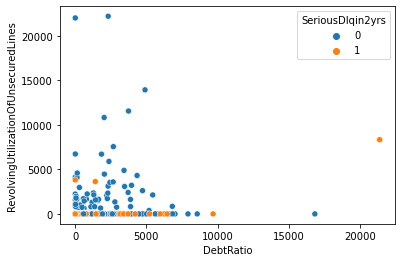

In [138]:
sns.scatterplot(a,b,hue=train_data.SeriousDlqin2yrs)

C:\Users\amitm2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\amitm2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='Density'>

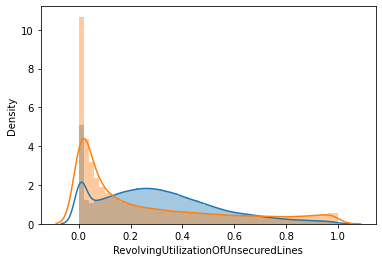

In [150]:
sns.distplot(a)
sns.distplot(b)
#sns.distplot(c)

C:\Users\amitm2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\amitm2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\amitm2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\amitm2\Anaconda3\lib\site-packages\seaborn\_decorators.

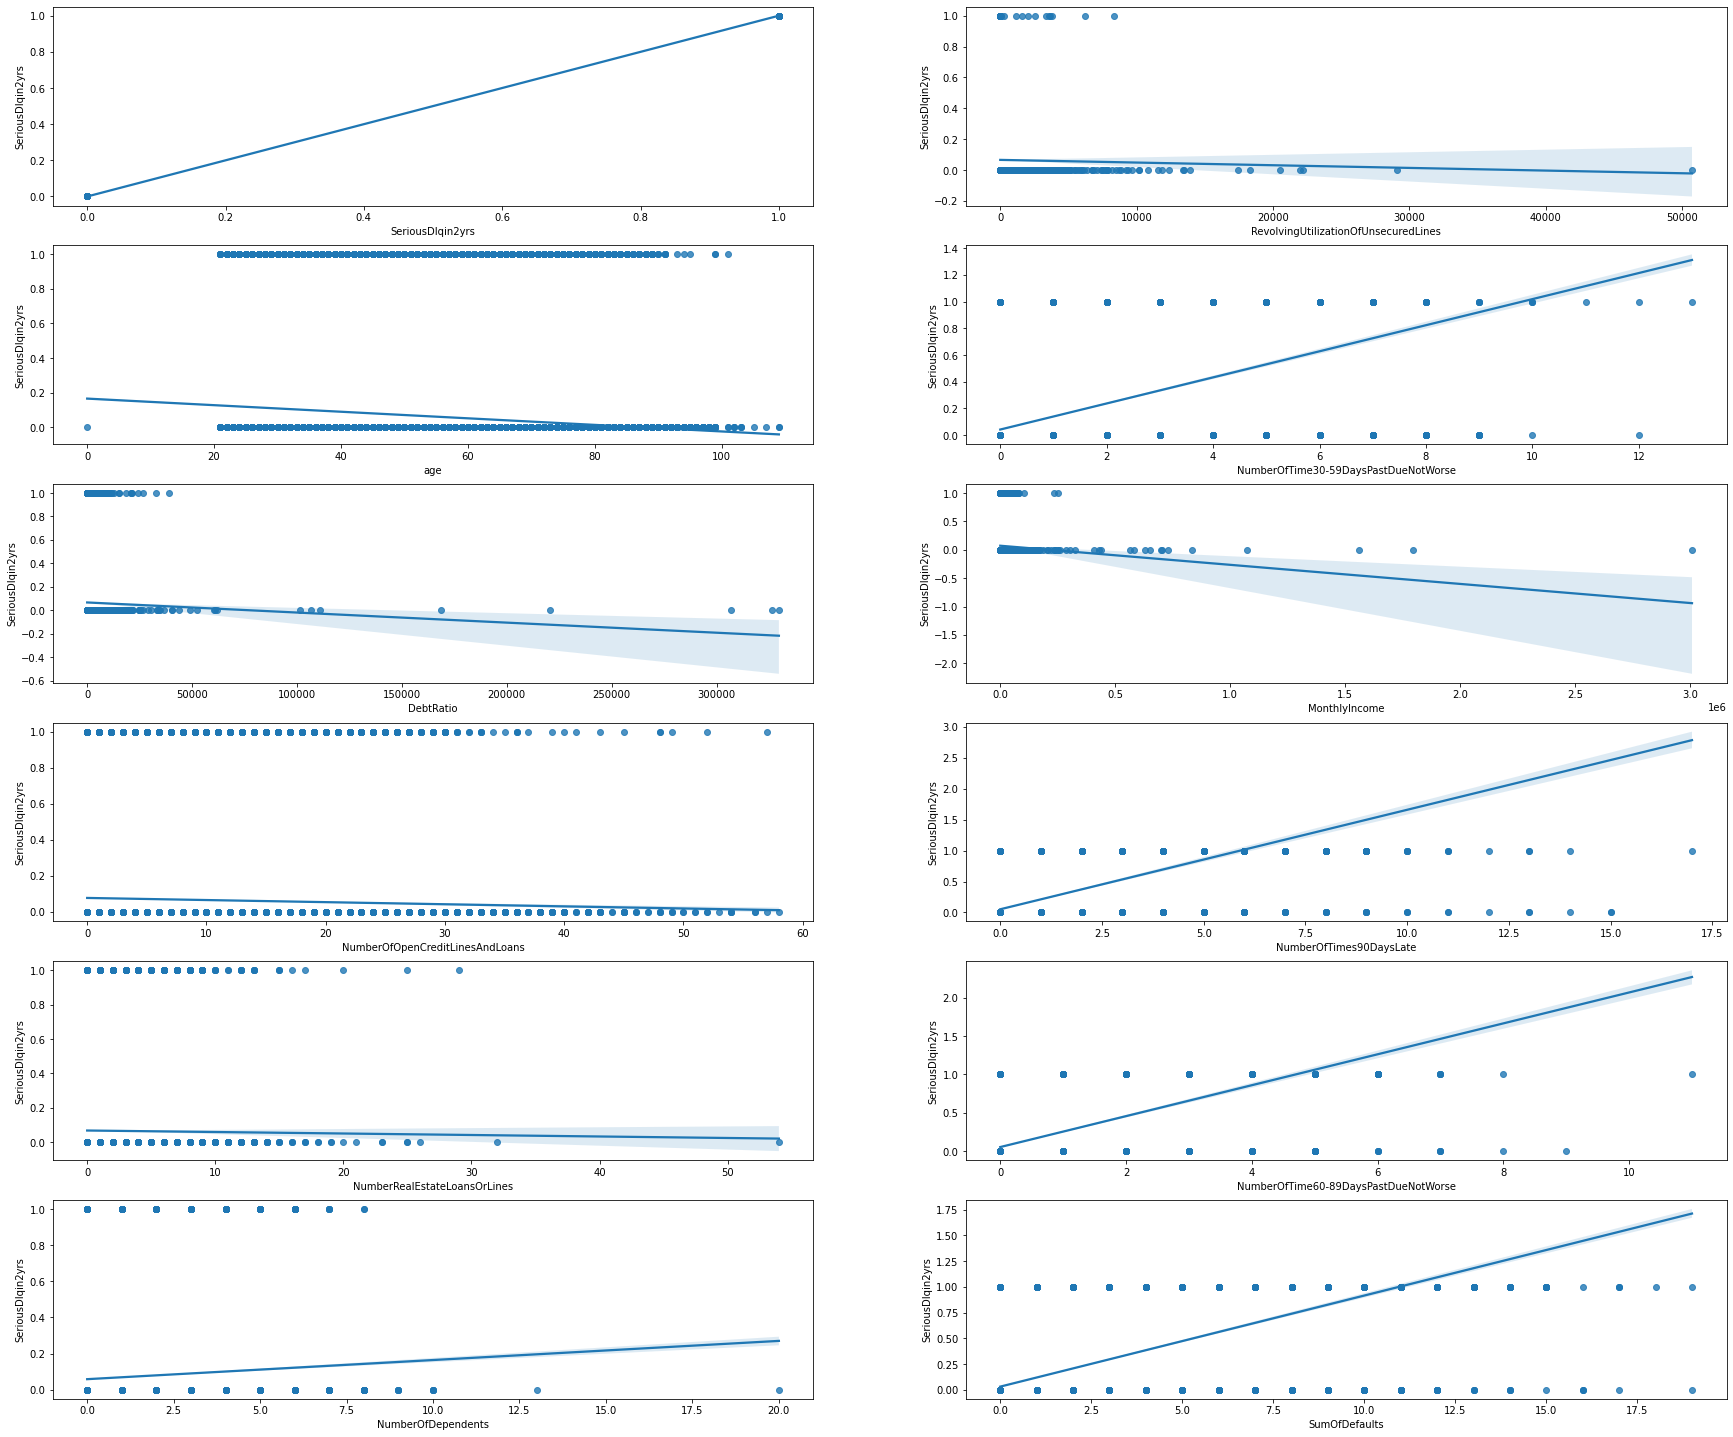

In [152]:
fig = plt.figure(figsize=[30,30])
for col,i in zip(train_data.columns,range(1,13)):
    axes = fig.add_subplot(7,2,i)
    sns.regplot(train_data[col],train_data.SeriousDlqin2yrs,ax=axes)
plt.show()

In [158]:
train_data[train_data.DebtRatio>=train_data.DebtRatio.quantile(0.75)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SumOfDefaults,Weighted_SumOfDefaults
6,0,0.305664,57,0,5710.000000,NaN,8,0,3,0,0.0,0,0.0
8,0,0.116943,27,0,46.000000,NaN,2,0,0,0,NaN,0,0.0
14,0,0.019653,76,0,477.000000,0.0,6,0,1,0,0.0,0,0.0
16,0,0.061096,78,0,2058.000000,NaN,10,0,2,0,0.0,0,0.0
25,1,0.392334,50,0,1.595253,4676.0,14,0,3,0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149976,0,0.000628,76,0,60.000000,NaN,5,0,0,0,0.0,0,0.0
149977,0,0.236450,29,0,349.000000,NaN,3,0,0,0,0.0,0,0.0
149984,0,0.037537,84,0,25.000000,NaN,5,0,0,0,0.0,0,0.0
149992,0,0.872070,50,0,4132.000000,NaN,11,0,1,0,3.0,0,0.0


C:\Users\amitm2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

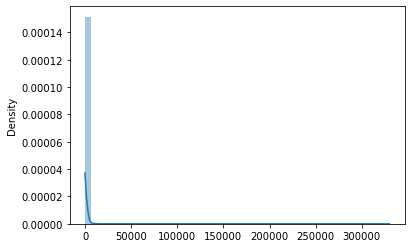

In [162]:
sns.distplot(train_data[(train_data.MonthlyIncome<=0)|(train_data.MonthlyIncome.isna())])

In [ ]:
data['debt'] = data['MonthlyIncome'] * data['DebtRatio']

In [ ]:
data.hist(bins=30, figsize=(15,15))
plt.show()

In [ ]:
val = data[data.RevolvingUtilizationOfUnsecuredLines<1]['RevolvingUtilizationOfUnsecuredLines'].values
index = data[data.RevolvingUtilizationOfUnsecuredLines<1]['RevolvingUtilizationOfUnsecuredLines'].index
hue = data[data.RevolvingUtilizationOfUnsecuredLines<1]['SeriousDlqin2yrs'].values

In [ ]:
#data.groupby('SeriousDlqin2yrs')['RevolvingUtilizationOfUnsecuredLines'].mean().plot(kind='bar')
sns.barplot(x='SeriousDlqin2yrs',y='RevolvingUtilizationOfUnsecuredLines',data=data,palette="Set3")

In [ ]:
sns.barplot(x='SeriousDlqin2yrs',y='debt',data=data,palette="Set3")

In [ ]:
sns.barplot(x='SeriousDlqin2yrs',y='MonthlyIncome',data=data,palette="Set3")

In [ ]:
sns.barplot(x='SeriousDlqin2yrs',y='DebtRatio',data=data,palette="Set3")

In [ ]:
g = sns.displot(data, x='age', col='SeriousDlqin2yrs', bins=30, linewidth=0, height=5, kde=True, aspect=1.6, facet_kws={'sharey': False, 'sharex': True})
g.axes[0,1]
plt.show()

In [ ]:
g = sns.displot(data, x='DebtRatio', col='SeriousDlqin2yrs', bins=30, linewidth=0, height=5, kde=True, aspect=1.6, facet_kws={'sharey': False, 'sharex': True})
g.axes[0,1]
plt.show()

In [ ]:
g = sns.displot(data, x='MonthlyIncome', col='SeriousDlqin2yrs', linewidth=0, height=5, kde=True, aspect=1.6, facet_kws={'sharey': False, 'sharex': True})
g.axes[0,1]
plt.show()

In [ ]:
g = sns.displot(data, x='debt', col='SeriousDlqin2yrs', linewidth=0, height=5, kde=True, aspect=1.6, facet_kws={'sharey': False, 'sharex': True})
g.axes[0,1]
plt.show()

In [ ]:
data.memory_usage().sum()

In [ ]:
1024**2

In [ ]:
data.info()

In [ ]:
data['SeriousDlqin2yrs'].dtype.name

In [ ]:
data['SeriousDlqin2yrs'].min(),data['SeriousDlqin2yrs'].max(),

In [ ]:
np.iinfo(np.int8)